# Applications instruction profile

In [1]:
#import the libraries
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
#load the profile file
profile_df = pd.read_csv("data/profile_kepler.csv", index_col=0)
profile_df

,FMA,MUL,ADD,INT,LDST,FPSPC,OTHERS
Lava,0.249831,0.249838,0.218609,0.047041,0.065588,0.062458,0.106635
MxM,0.358694,0.000000,0.000000,0.102171,0.493259,0.000000,0.045876
Quicksort,0.000000,0.000000,0.000000,0.703157,0.082400,0.000000,0.214443
Hotspot,0.106619,0.000000,0.056589,0.482705,0.070923,0.026668,0.256496
YoloV3,0.451606,0.006347,0.004684,0.226655,0.080444,0.008279,0.221985
Gaussian,0.029589,0.000000,0.000029,0.588078,0.117639,0.000029,0.264637
LUD,0.300614,0.000000,0.009387,0.180403,0.434136,0.000037,0.075422
Lenet,0.248160,0.006907,0.003851,0.326312,0.201344,0.001239,0.212188


# Microbenchmarks Architectural Vulnerability Factor (AVF)

Microbenchmarks AVF extracted on FlexGripPlus

In [3]:
# Let's load the AVF data
micro_avf_df = pd.read_csv("data/avf_micro_instructions.csv")
micro_avf_df

,unit,data type,Instruction,input,Faults injected,SDC total,SDC individual,SDC multiple,Hang
0,Execution unit,Floating,FADD,Small,13575,553,553,0,0
1,Execution unit,Floating,FADD,Common,13575,703,703,0,0
2,Execution unit,Floating,FADD,Big,13575,687,687,0,0
3,Execution unit,Floating,FMUL,Small,9540,443,443,0,0
4,Execution unit,Floating,FMUL,Common,9540,459,459,0,0
...,...,...,...,...,...,...,...,...,...
77,pipeline,Integer,FEXP,big,43796,464,159,305,824
78,pipeline,Integer,Load,mem,16000,340,71,269,810
79,pipeline,Integer,Store,mem,16000,294,55,239,847
80,pipeline,Integer,BRANCH,mem,8000,149,71,78,839


In [4]:
# Calc the AVF for each outcome (SDC single, SDC mult, DUE)
micro_avf_df["SDC single"] = micro_avf_df["SDC individual"] / micro_avf_df["Faults injected"]
micro_avf_df["SDC mult"] = micro_avf_df["SDC multiple"] / micro_avf_df["Faults injected"]
micro_avf_df["DUE"] = micro_avf_df["Hang"] / micro_avf_df["Faults injected"]

# Set the index
micro_avf_df = micro_avf_df.set_index(["unit", "data type", "Instruction"])

micro_avf_df

input  Faults injected  SDC total  \
unit           data type Instruction                                       
Execution unit Floating  FADD          Small            13575        553   
                         FADD         Common            13575        703   
                         FADD            Big            13575        687   
                         FMUL          Small             9540        443   
                         FMUL         Common             9540        459   
...                                      ...              ...        ...   
pipeline       Integer   FEXP            big            43796        464   
                         Load            mem            16000        340   
                         Store           mem            16000        294   
                         BRANCH          mem             8000        149   
                         ISET            mem             8000        239   

                                      SDC individual  SDC multiple  Hang  \
unit           data type Instruction                                       
Execution unit Floating  FADD                    553             0     0   
                         FADD                    703             0     0   
                         FADD                    687             0     0   
                         FMUL                    443             0     0   
                         FMUL                    459             0     0   
...                                              ...           ...   ...   
pipeline       Integer   FEXP                    159           305   824   
                         Load                     71           269   810   
                         Store                    55           239   847   
                         BRANCH                   71            78   839   
                         ISET                    107           132   851   

                                      SDC single  SDC mult       DUE  
unit           data type Instruction                                  
Execution unit Floating  FADD           0.040737  0.000000  0.000000  
                         FADD           0.051786  0.000000  0.000000  
                         FADD           0.050608  0.000000  0.000000  
                         FMUL           0.046436  0.000000  0.000000  
                         FMUL           0.048113  0.000000  0.000000  
...                                          ...       ...       ...  
pipeline       Integer   FEXP           0.003630  0.006964  0.018815  
                         Load           0.004437  0.016813  0.050625  
                         Store          0.003438  0.014937  0.052937  
                         BRANCH         0.008875  0.009750  0.104875  
                         ISET           0.013375  0.016500  0.106375  

[82 rows x 9 columns]

<AxesSubplot:xlabel='unit,data type,Instruction'>

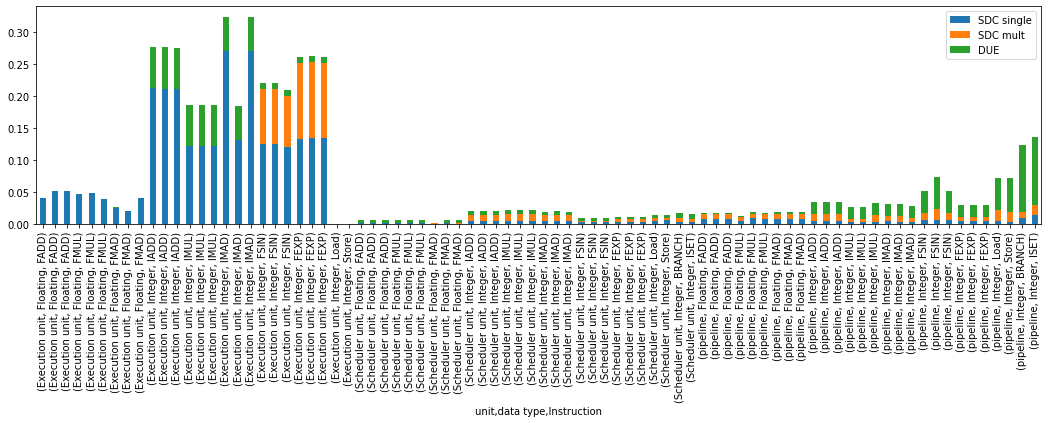

In [5]:
# Plot the AVF for all the input sizes (similar to figure 4 in the paper)
fig, ax = plt.subplots(figsize=(18, 4))

micro_avf_df[["SDC single", "SDC mult", "DUE"]].plot(kind='bar', stacked=True, ax=ax)

# Benchmarks Program Vulnerability Factor (PVF)

The PVF was extracted using the approach proposed in the paper throught a NVBITFI modification

In [6]:
# Load the file
benchmarks_df = pd.read_csv("data/avf_benchmarks.csv", index_col=0)
benchmarks_df

,Single Bit flip,Relative error FUs,Relative error Pipeline,Relative error,t-MxM
Gaussian,1.000000,1.000000,1.000000,1.000000,0.00
Lava,0.692308,0.916822,0.917610,0.917216,0.00
Quicksort,0.948980,0.957547,0.945129,0.951338,0.00
Hotspot,0.252562,0.364384,0.393632,0.379008,0.00
LUD,0.819708,0.995693,0.994182,0.994937,0.00
MxM,0.958988,0.992711,0.992582,0.992646,0.00
LeNET,0.031767,0.028917,0.069012,0.048965,0.67
YoloV3,0.173709,0.223447,0.320732,0.272090,0.27


<AxesSubplot:>

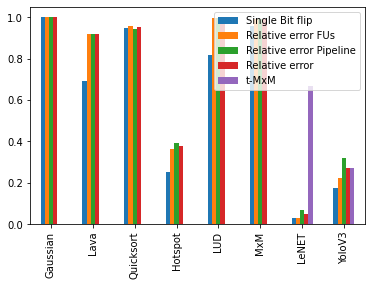

In [7]:
# To plot similar to figure 10 in the paper
benchmarks_df.plot.bar()